# import the necessry libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import mutual_info_regression, SelectKBest, SelectFromModel
from sklearn.linear_model import Lasso,Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# import the dataset

In [2]:
flight=pd.read_csv(r'C:\My data\Machine learning data set\Flight-Price-Prediction-master\Data_Train.csv')

In [3]:
flight.head()

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,NaN,3897
1,1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,NaN,13302


In [4]:
flight.tail()

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
#remove the first column which is redundant
flight.drop(flight.columns[0],axis=1,inplace=True)

In [6]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,NaN,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,NaN,13302


In [7]:
flight.isnull().sum()

Airline             0
Date_of_Journey     0
Source              0
Destination         0
Route               1
Dep_Time            0
Arrival_Time        0
Duration            0
Total_Stops         1
Additional_Info    76
Price               0
dtype: int64

# handling the null values

In [8]:
flight.Additional_Info.unique()

array([nan, 'No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [9]:
flight.Additional_Info.value_counts()

No info                         8286
In-flight meal not included     1967
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

# replace the null values with mode values

In [10]:
flight.Additional_Info.fillna(flight.Additional_Info.mode()[0],inplace=True)

In [11]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
flight.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [13]:
flight.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [14]:
flight.dropna(subset=['Total_Stops'],inplace=True)

In [15]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [16]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [17]:
flight.Date_of_Journey.min()

'01/03/2019'

In [18]:
flight.Date_of_Journey.max()

'9/06/2019'

In [19]:
flight.shape

(10682, 11)

# Do the feature engineering date of journey column

In [20]:
from datetime import datetime , date

In [21]:
flight.Date_of_Journey.dtypes

dtype('O')

In [22]:
flight.Date_of_Journey=pd.to_datetime(flight.Date_of_Journey)

In [23]:
flight['Journey_day']=flight.Date_of_Journey.dt.day
flight['Journey_month']=flight.Date_of_Journey.dt.month

In [24]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [25]:
# remove the date of journey column
flight.drop('Date_of_Journey',axis=1, inplace=True)

In [26]:
flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [27]:
def dur_hour(x):
    if len(x.split()) < 2 :
        if 'h' in x.split()[0]:
            return x.split()[0]
        else:
            return '0h'
    else:
        return x.split()[0]

In [28]:
flight['dur_hour']=flight.Duration.apply(lambda x : dur_hour(x))

In [29]:
def dur_minute(x):
    if len(x.split()) < 2 :
        if 'm' in x.split()[0]:
            return x.split()[0]
        else:
            return '0m'
    else:
        return x.split()[1]

In [30]:
flight['dur_minute']=flight.Duration.apply(lambda x : dur_minute(x))

In [31]:
flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dur_hour,dur_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,19h,0m
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,4h,45m


In [32]:
import re
flight.dur_hour=flight.dur_hour.apply(lambda x : int(re.sub("h","",x)))
flight.dur_minute=flight.dur_minute.apply(lambda x : int(re.sub("m","",x)))

In [33]:
flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dur_hour,dur_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,4,45


In [34]:
flight.drop('Duration',axis=1,inplace=True)

In [35]:
flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dur_hour,dur_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,5,1,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,6,9,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,5,12,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,3,1,4,45


# handling categorical column

In [36]:
flight.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [37]:
stop= {'1 stop' : 1 , 'non-stop' : 0 , '2 stops' : 2 , '3 stops' : 3 , '4 stops' : 4}

In [38]:
flight.Total_Stops=flight.Total_Stops.map(stop)

In [39]:
flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dur_hour,dur_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2,No info,7662,5,1,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2,No info,13882,6,9,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,No info,6218,5,12,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1,No info,13302,3,1,4,45


In [40]:
flight.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [41]:
flight.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [42]:
flight.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [43]:
flight.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [44]:
flight.loc[flight.Additional_Info == 'No Info','Additional_Info'] = 'No info'

In [45]:
flight.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [49]:
flight=pd.get_dummies(flight, columns=['Airline','Source','Destination','Additional_Info'],drop_first=True)

# Drop the redundant columns

In [51]:
flight.drop(['Route','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [52]:
flight.head()

,Total_Stops,Price,Journey_day,Journey_month,dur_hour,dur_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,2,50,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,2,7662,5,1,7,25,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,13882,6,9,19,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,6218,5,12,5,25,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,13302,3,1,4,45,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [53]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Total_Stops                                   10682 non-null  int64
 1   Price                                         10682 non-null  int64
 2   Journey_day                                   10682 non-null  int64
 3   Journey_month                                 10682 non-null  int64
 4   dur_hour                                      10682 non-null  int64
 5   dur_minute                                    10682 non-null  int64
 6   Airline_Air India                             10682 non-null  uint8
 7   Airline_GoAir                                 10682 non-null  uint8
 8   Airline_IndiGo                                10682 non-null  uint8
 9   Airline_Jet Airways                           10682 non-null  uint8
 10  Airline_Je

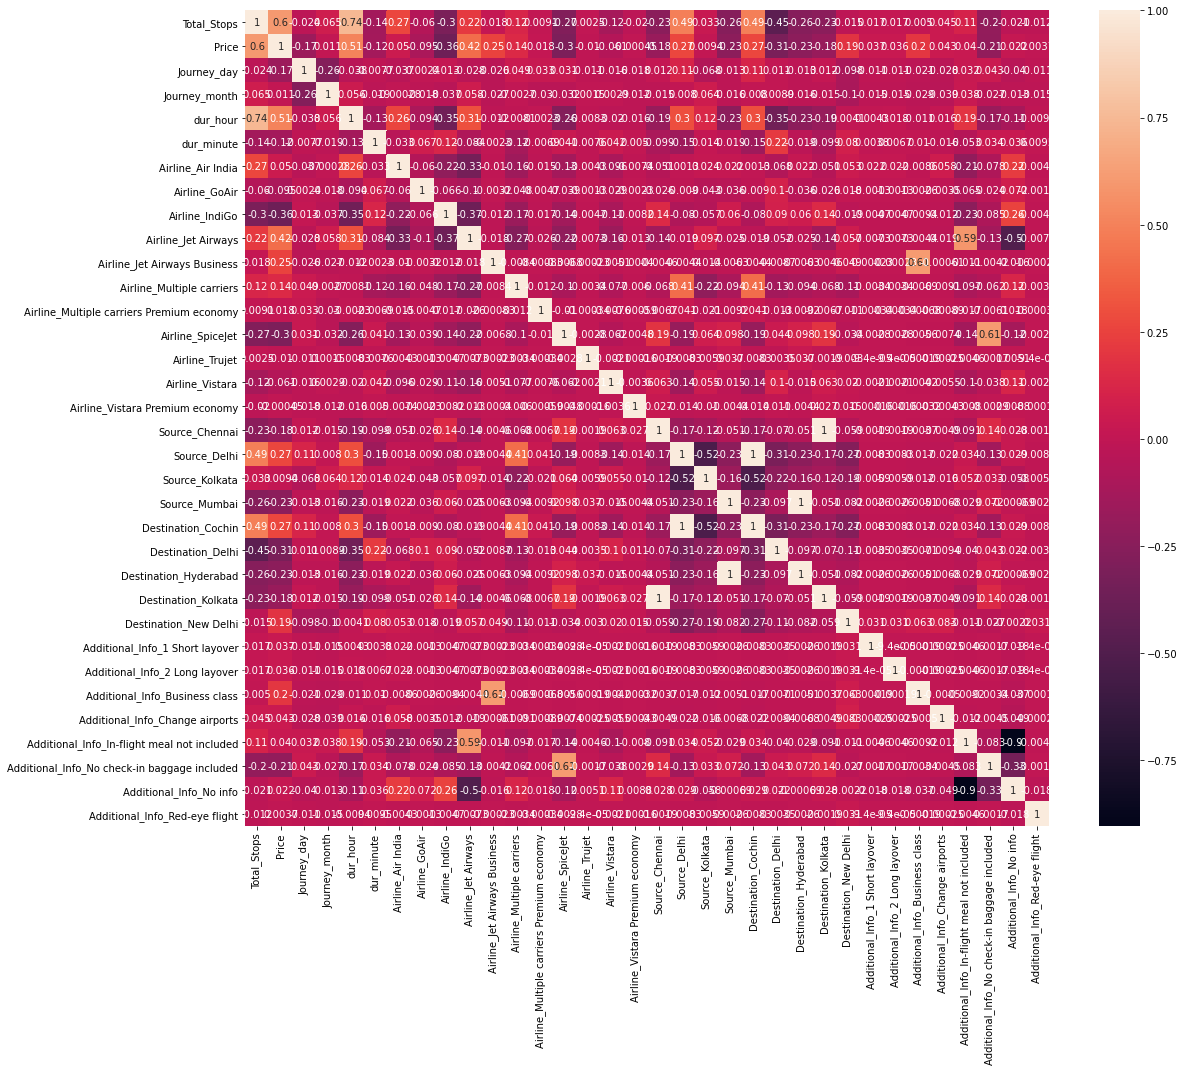

In [56]:
plt.figure(figsize=(18,15))
sns.heatmap(flight.corr(), annot=True)

In [61]:
flight.select_dtypes('int64')

,Total_Stops,Price,Journey_day,Journey_month,dur_hour,dur_minute
0,0,3897,24,3,2,50
1,2,7662,5,1,7,25
2,2,13882,6,9,19,0
3,1,6218,5,12,5,25
4,1,13302,3,1,4,45
...,...,...,...,...,...,...
10678,0,4107,4,9,2,30
10679,0,4145,27,4,2,35
10680,0,7229,27,4,3,0
10681,0,12648,3,1,2,40


In [62]:
for col in flight.select_dtypes('int64'):
    print(f'maximum value of {col}',flight[col].max())
    print(f'minimum value of {col}',flight[col].min())

maximum value of Total_Stops 4
minimum value of Total_Stops 0
maximum value of Price 79512
minimum value of Price 1759
maximum value of Journey_day 27
minimum value of Journey_day 3
maximum value of Journey_month 12
minimum value of Journey_month 1
maximum value of dur_hour 47
minimum value of dur_hour 0
maximum value of dur_minute 55
minimum value of dur_minute 0


In [57]:
x = flight.drop('Price',axis=1)
y = flight['Price']

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=0.2)

In [64]:
dec_tree = DecisionTreeRegressor()

In [65]:
cross_val_score(dec_tree,x,y,cv=10,scoring='r2',n_jobs=1)

array([0.8032523 , 0.75053539, 0.71905655, 0.80717188, 0.78944882,
       0.83115462, 0.82935393, 0.77978196, 0.7498199 , 0.75213235])

In [66]:
dec_tree.fit(x_train,y_train)
r2_score(y_test , dec_tree.predict(x_test))

0.7100924345451128

# Hyperparameter tuning

In [107]:
param = {'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"],
    'splitter' : ["best", "random"],
    'max_depth' : [2,3,4,5,6,7,8,9,10],
    'min_samples_split' : [2,3,4,5,6,7,8],
    #'min_samples_leaf' : [1,2,3,4],
    'max_features' : ["auto", "sqrt", "log2" , 5,8,10,12,15,20,25] }

In [114]:
rand_cv = RandomizedSearchCV(dec_tree, param , n_iter=10, n_jobs=2 , scoring='r2' , cv= 10 ,random_state= 12)

In [115]:
rand_cv.fit(x,y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=2,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         5, 8, 10, 12, 15, 20,
                                                         25],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'splitter': ['best', 'random']},
                   random_state=12, scoring='r2')

In [116]:
rand_cv.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=10, max_features=10,
                      min_samples_split=4)

In [117]:
rand_cv.best_params_

{'splitter': 'best',
 'min_samples_split': 4,
 'max_features': 10,
 'max_depth': 10,
 'criterion': 'absolute_error'}

In [118]:
rand_cv.best_score_

0.7724287137100871

In [106]:
rand_cv.predict(x_test)

array([ 5516.63333333, 10753.3946932 , 13938.67863894, ...,
        7651.47008547,  7651.47008547, 10224.55754476])

In [113]:
rand_cv.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeRegressor(),
 'n_iter': 10,
 'n_jobs': -1,
 'param_distributions': {'criterion': ['squared_error',
   'friedman_mse',
   'absolute_error',
   'poisson'],
  'splitter': ['best', 'random'],
  'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
  'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
  'max_features': ['auto', 'sqrt', 'log2', 5, 8, 10, 12, 15, 20, 25]},
 'pre_dispatch': '2*n_jobs',
 'random_state': 12,
 'refit': True,
 'return_train_score': False,
 'scoring': 'r2',
 'verbose': 0}

# saving a model (using Pickle)

In [119]:
import pickle

In [123]:
with open('model_decision_tree.pkl' , 'wb') as f:
    pickle.dump(rand_cv,f)
# another way to use pickle 
# pickle.dump(rand_cv , open('model_decison_tree.pkl','wb'))

In [124]:
model_tree = pickle.load(open('model_decision_tree.pkl' , 'rb'))

In [127]:
model_tree.get_params()
model_tree.cv_results_

{'mean_fit_time': array([0.01857834, 3.00029337, 2.11941302, 0.02014685, 0.0160125 ,
        0.0216459 , 0.02062955, 0.01316919, 2.53015623, 0.01900926]),
 'std_fit_time': array([0.00288287, 0.62683372, 0.48117659, 0.00621844, 0.00168694,
        0.00623252, 0.00360792, 0.00272498, 0.72927153, 0.00148354]),
 'mean_score_time': array([0.00511384, 0.00594032, 0.00445688, 0.00655439, 0.00302722,
        0.00472434, 0.00436771, 0.00415254, 0.00468154, 0.00380447]),
 'std_score_time': array([0.00128636, 0.00166071, 0.0014751 , 0.00252556, 0.00029603,
        0.00145546, 0.00145588, 0.00029986, 0.0015537 , 0.00041707]),
 'param_splitter': masked_array(data=['best', 'random', 'best', 'random', 'best', 'best',
                    'best', 'random', 'random', 'random'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 5, 4, 6, 7, 5, 8